问题的核心是客户流失预测。具体来说，目标是通过分析不同的特征来预测客户是否会在下个月流失。这个问题属于分类问题，目标变量是 `Churn`（是否流失），值为 "Yes" 或 "No"。

### 问题分析

1. **目标变量：** `Churn` 列，指示客户是否在过去一个月内流失。目标是预测这个变量的值。

2. **特征：** 
   - **服务相关：** 客户是否订阅了电话、互联网、多条线路、在线安全、在线备份、设备保护、技术支持、流媒体电视和电影等服务。
   - **账户信息：** 客户的在网时长（`tenure`）、合同类型、支付方式、是否启用纸质账单、月度费用和总费用等。
   - **人口统计信息：** 客户的性别、年龄范围、是否有配偶和子女等。

### 解决方案

1. **数据预处理：**
   - **缺失值处理：** 检查数据中是否有缺失值，并采取适当的填补方法（例如均值填充或删除缺失数据）。
   - **类别变量处理：** 对如 `gender`、`contract`、`payment method` 等类别变量进行编码，使用独热编码（One-Hot Encoding）或标签编码（Label Encoding）等方法。
   - **数据标准化：** 对如 `tenure`、`monthly charges`、`total charges` 等数值型特征进行标准化或归一化处理，以提升模型性能。

2. **特征工程：**
   - **特征选择：** 通过计算特征的重要性或使用L1正则化等方法，选择对流失预测最有帮助的特征。
   - **构造新特征：** 可以考虑构造一些新的特征，如客户的月度消费与总消费的比值，来更好地表示客户的行为模式。

3. **模型选择：**
   - **逻辑回归（Logistic Regression）：** 适用于二分类问题，简单且易于解释。
   - **决策树（Decision Tree）：** 适合处理非线性关系，但容易过拟合。
   - **随机森林（Random Forest）：** 一种集成学习方法，能够处理大量特征且不容易过拟合。
   - **XGBoost / LightGBM：** 这两种梯度提升方法通常在分类问题中表现良好，适用于处理复杂的模式。
   - **神经网络（Neural Networks）：** 若数据较大且复杂，深度学习方法可能会有更好的表现。

4. **评估标准：**
   - 使用交叉验证来评估模型的泛化能力。
   - 使用准确率（Accuracy）、精确度（Precision）、召回率（Recall）、F1得分等指标来衡量模型的性能。
   - 对于不平衡数据，可以采用混淆矩阵、ROC曲线和AUC值等来衡量模型的效果。

5. **模型优化：**
   - **超参数调优：** 使用网格搜索（Grid Search）或随机搜索（Random Search）等方法优化模型的超参数。
   - **处理类别不平衡：** 如果数据中流失的客户与非流失客户不平衡，可以使用过采样（如SMOTE）或欠采样技术，或者在模型中调整类权重。

6. **最终提交：**
   - 在测试集上预测客户是否流失，并根据指定的格式生成提交文件（通常是ID和预测的目标变量）。


# 1.导入数据

In [2]:
import pandas as pd
import os
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('../input/u-churn-prediction/u-churn-train.csv')
test=pd.read_csv('../input/u-churn-prediction/u-churn-test.csv')
train.shape,test.shape

((5634, 21), (1409, 20))

# 2.了解数据

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5634.0,0.160809,0.367388,0.00,0.00,0.000,0.0000,1.0
tenure,5634.0,32.373092,24.424539,0.00,9.00,29.000,55.0000,72.0
MonthlyCharges,5634.0,64.864253,30.089324,18.25,35.75,70.525,89.9375,118.6


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [6]:
import seaborn as sns

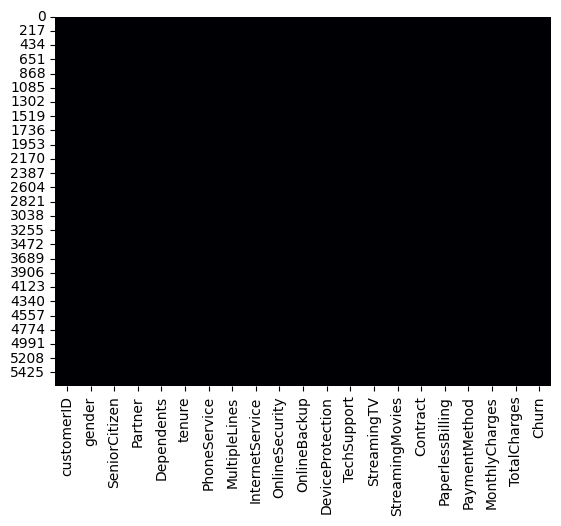

In [7]:
sns.heatmap(train.isnull(),cmap = 'magma',cbar = False);

In [8]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [9]:
train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

我们发现好像所谓的数值变量少的可怜

In [10]:
list(set(train.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [11]:
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.head(3)

,SeniorCitizen,tenure,MonthlyCharges
0,0,21,64.85
1,0,54,97.20
2,0,1,23.45


# 3.数据处理

## 3.1 目标变量的处理 

In [12]:
# 将目标变量 'Churn' 转换为 0 和 1
train['Churn'] = train['Churn'].map({'Yes': 1, 'No': 0})

# 查看转换后的数据
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,0
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,1
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0


看看yes和no的比例

In [13]:
threshold=train['Churn'].count()/train['Churn'].sum()
threshold

np.float64(3.766042780748663)

貌似这个数据的分布是no偏多，这个对模型的估计会不会有问题呢？？？
这个其实就是类别不均衡的问题，在最后设置阈值的时候要变一下，我就不采用过采样和欠采样了，对于kaggle比赛来说效果不好，我怀疑test就是和train一个分布的哈哈

## 3.2 检查缺失值

In [14]:
# 检查训练集和测试集的缺失值
train.isnull().sum(), test.isnull().sum()

(customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 dtype: int64)

我去，尼玛没有缺失值，六百六十六

## 3.3 重复值

In [15]:
# 删除重复数据
train = train.drop_duplicates()

# 检查是否有重复行
train.shape

(5634, 21)

## 3.4 尼玛也没有,看看异常的

In [16]:
# 查看 'tenure' 列的描述性统计，检查是否有异常值
print(train['tenure'].describe())

# 处理异常值（如果需要）
train = train[train['tenure'] >= 0]  # 例如：删除tenure列中负数的行

count    5634.000000
mean       32.373092
std        24.424539
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


## 3.5 类型转化 

先看看数值类型

先把数据分为feature，和label

In [17]:
# Remove the Ids from train and test, as they are unique for each row and hence not useful for the model
train_ID = train['customerID']
test_ID = test['customerID']
train.drop(['customerID'], axis=1, inplace=True)
test.drop(['customerID'], axis=1, inplace=True)
train.shape, test.shape

((5634, 20), (1409, 19))

In [18]:
# Split features and labels
train_labels = train['Churn'].reset_index(drop=True)# drop=true,表明删除原来的索引
train_features = train.drop(['Churn'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(7043, 19)

In [19]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)
numeric

['SeniorCitizen', 'tenure', 'MonthlyCharges']

这里的SeniorCitizen不对，应该是类别变量

In [20]:
# 将 'SeniorCitizen' 转换为类别类型
all_features['SeniorCitizen'] = all_features['SeniorCitizen'].astype('object')

# 查看转换后的数据类型
all_features.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [21]:
all_features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


我尼玛，怎么又有空值

md，这个TotalCharges坑了我，这小子居然是尼玛的字符，里面的空值是“”

In [22]:
# 将 'total charges' 列转换为数值型，并将无法转换的字符变为 NaN
all_features['TotalCharges'] = pd.to_numeric(all_features['TotalCharges'], errors='coerce')

# 检查缺失值
all_features['TotalCharges'].isnull().sum()

np.int64(11)

这里我本来想要删除缺失值的，但是我想了一下，要是缺失值删了我后面把allfeature给拆回来不好搞啊


In [23]:
# 使用均值填充缺失值
all_features['TotalCharges'] = all_features['TotalCharges'].fillna(all_features['TotalCharges'].mean())
all_features.isnull().sum(), all_features.shape

(gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 dtype: int64,
 (7043, 19))

In [24]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)
numeric

['tenure', 'MonthlyCharges', 'TotalCharges']

## 3.6 数值类型的纠偏处理

In [25]:
from scipy.stats import skew, kurtosis

# 计算数值特征的偏度和峰度
skew_values = all_features[numeric].apply(skew)
kurt_values = all_features[numeric].apply(kurtosis)

# 显示偏度和峰度
skew_values, kurt_values

(tenure            0.239489
 MonthlyCharges   -0.220477
 TotalCharges      0.962189
 dtype: float64,
 tenure           -1.387239
 MonthlyCharges   -1.257219
 TotalCharges     -0.228158
 dtype: float64)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

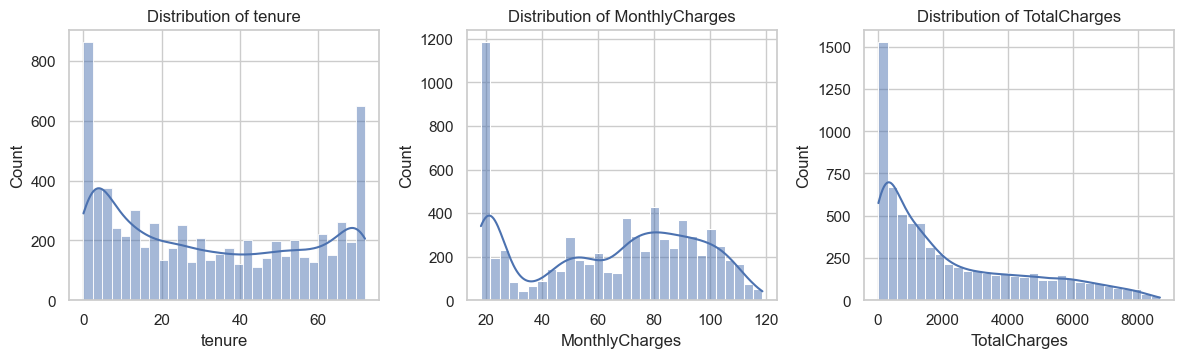

In [27]:
# 绘制数值变量的直方图
numeric_features = all_features[numeric]  # 数值变量

# 设置绘图样式
sns.set(style="whitegrid")

# 创建一个画布，设置子图的大小
plt.figure(figsize=(12, 10))

# 对每个数值特征绘制直方图
for i, feature in enumerate(numeric_features.columns, 1):
    plt.subplot(3, 3, i)  # 3行3列的子图
    sns.histplot(numeric_features[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

我说实话，这个数值的分布有点抽象了

In [28]:
from scipy.stats import boxcox

# 对正数变量进行Box-Cox变换
for feature in numeric:
    if all_features[feature].min() > 0:  # 只适用于正数数据
        all_features[feature], _ = boxcox(all_features[feature])

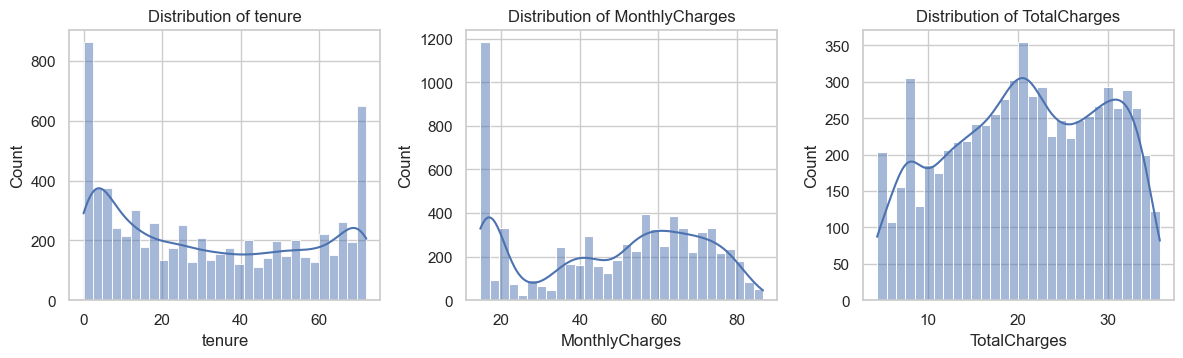

In [29]:
# 绘制数值变量的直方图
numeric_features = all_features[numeric]  # 数值变量

# 设置绘图样式
sns.set(style="whitegrid")

# 创建一个画布，设置子图的大小
plt.figure(figsize=(12, 10))

# 对每个数值特征绘制直方图
for i, feature in enumerate(numeric_features.columns, 1):
    plt.subplot(3, 3, i)  # 3行3列的子图
    sns.histplot(numeric_features[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

这个TotalCharges不错

我只能自我安慰，哈哈哈哈


## 3.8 归一化

In [30]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
all_features[numeric]=mms.fit_transform(all_features[numeric])
all_features[numeric].head()

,tenure,MonthlyCharges,TotalCharges
0,0.291667,0.480649,0.519787
1,0.750000,0.795304,0.840938
2,0.013889,0.056440,0.015305
3,0.055556,0.533431,0.240466
4,0.000000,0.451395,0.634603


## 编码

describe()都是数值类的

In [31]:
all_features.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,0.449599,0.473414,0.523693
std,0.341104,0.301257,0.270643
min,0.000000,0.000000,0.000000
25%,0.125000,0.183660,0.312803
50%,0.402778,0.534906,0.529166
75%,0.763889,0.724681,0.758519
max,1.000000,1.000000,1.000000


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
text_data_features = [i for i in list(all_features.columns) if i not in list(all_features.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    all_features[i] = le.fit_transform(all_features[i])
    print(i,' : ',all_features[i].unique(),' = ',le.inverse_transform(all_features[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
SeniorCitizen  :  [0 1]  =  [0 1]
Partner  :  [0 1]  =  ['No' 'Yes']
Dependents  :  [1 0]  =  ['Yes' 'No']
PhoneService  :  [1 0]  =  ['Yes' 'No']
MultipleLines  :  [0 2 1]  =  ['No' 'Yes' 'No phone service']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
OnlineBackup  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
DeviceProtection  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Contract  :  [1 2 0]  =  ['One year' 'Two year' 'Month-to-month']
PaperlessBilling  :  [0 1]  =  ['No' 'Yes']
PaymentMethod  :  [3 0 2 1]  =  ['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)']


# 特征筛选

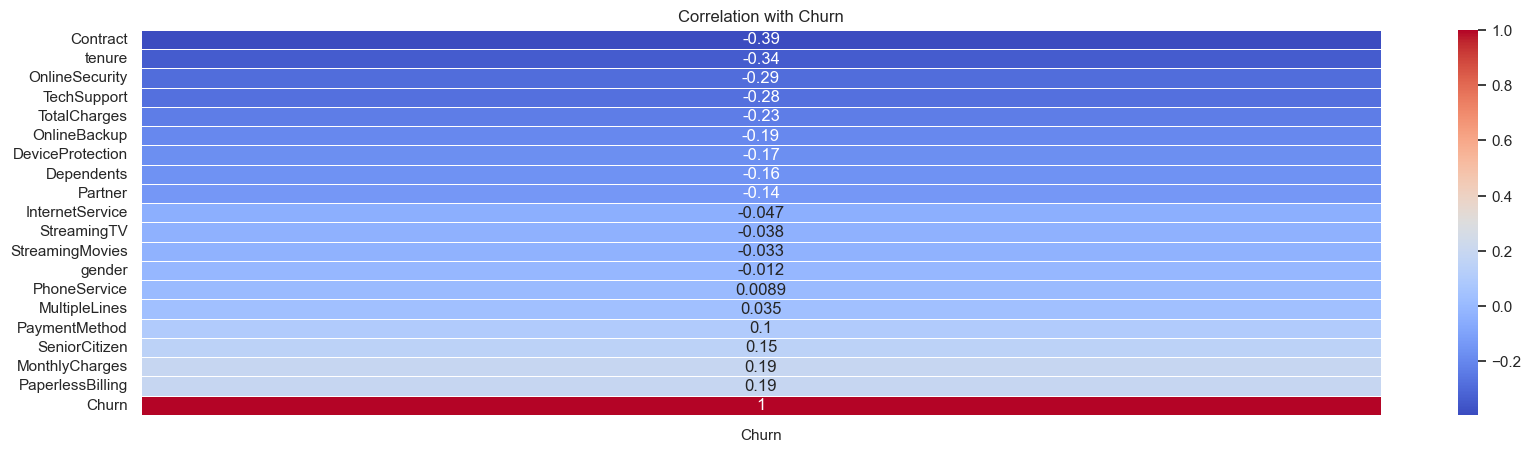

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 合并 all_features 和 train_labels  
df_all = pd.concat([all_features, train_labels], axis=1)

# 计算所有特征与 Churn 的相关性
churn_corr = df_all.corr()['Churn'].sort_values(ascending=True)

# 绘制与 Churn 相关的热图
plt.figure(figsize=(20,5))
sns.heatmap(churn_corr.to_frame(), cmap='coolwarm', annot=True, linewidths=0.5)
plt.title('Correlation with Churn')
plt.show()

In [34]:
len(churn_corr),churn_corr

(20,
 Contract           -0.394085
 tenure             -0.344925
 OnlineSecurity     -0.288143
 TechSupport        -0.278303
 TotalCharges       -0.232236
 OnlineBackup       -0.192645
 DeviceProtection   -0.172989
 Dependents         -0.162356
 Partner            -0.142266
 InternetService    -0.047171
 StreamingTV        -0.037937
 StreamingMovies    -0.032716
 gender             -0.011729
 PhoneService        0.008886
 MultipleLines       0.034952
 PaymentMethod       0.100844
 SeniorCitizen       0.147078
 MonthlyCharges      0.190279
 PaperlessBilling    0.191324
 Churn               1.000000
 Name: Churn, dtype: float64)

In [35]:
# 获取 'Gender' 列与 Churn 的相关性
gender_corr = churn_corr['gender']

# 找出与 Churn 相关性小于 Gender 的特征
features_to_remove = churn_corr[abs(churn_corr) <= abs(gender_corr)].index.tolist()

features_to_remove

['gender', 'PhoneService']

In [36]:
# 从 all_features 中删除这些特征
all_features = all_features.drop(columns=features_to_remove)

# 打印删除的特征
print(f"删除的特征: {features_to_remove}")

删除的特征: ['gender', 'PhoneService']


In [37]:
all_features.shape

(7043, 17)

## 3.8拆分为train 、test

In [38]:
train_labels

0       0
1       0
2       1
3       1
4       0
       ..
5629    1
5630    0
5631    0
5632    1
5633    0
Name: Churn, Length: 5634, dtype: int64

In [39]:
X=all_features.iloc[:len(train_labels),:]#iloc就是位置索引正常的loc是标签索引
X_test=all_features.iloc[len(train_labels):,]
X.shape,train_labels.shape,X_test.shape

((5634, 17), (5634,), (1409, 17))

In [40]:
data_train=pd.concat([X,train_labels],axis=1)
data_test=X_test
data_train.to_csv(r'..\input\u-churn-prediction\u-churn-train-clean.csv',index=False)
data_test.to_csv(r'..\input\u-churn-prediction\u-churn-test-clean.csv',index=False)
data_train.shape,data_test.shape

((5634, 18), (1409, 17))

## 3.9 SMOTEENN 通过对少数类进行过采样和对多数类进行欠采样来平衡数据集??

In [ ]:
# from imblearn.over_sampling import SMOTE

In [ ]:
# from collections import Counter
# # from imblearn.combine import SMOTEENN
# # smoteenn = SMOTEENN()
# # X, train_labels = smoteenn.fit_resample(X, train_labels)
# # X.shape,train_labels.shape,X_test.shape,Counter(train_labels)
# over = SMOTE(sampling_strategy = 1)
# X, train_labels = over.fit_resample(X, train_labels)
# X.shape,train_labels.shape,X_test.shape,Counter(train_labels)

# 4. 模型参数优化以及训练

In [ ]:
# 类别样本数
n_0 = train['Churn'].count()-train['Churn'].sum()  # 多数类样本数
n_1 = train['Churn'].sum()  # 少数类样本数

# 手动计算权重
class_weight = {
    0:  (n_0 + n_1)/n_0,  # 多数类的权重
    1:  (n_0 + n_1)/n_1   # 少数类的权重
}
n_0,n_1,class_weight

我们更加关注少数类？？？

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb


# 逻辑回归参数
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # 正则化强度
    'penalty': ['l2'],  # 使用L2正则化
    'solver': ['lbfgs', 'liblinear'],  # 使用的求解器
    'max_iter': [1000],  # 最大迭代次数
    # 'class_weight':['balanced'] #类别权重
}

# 支持向量机参数
svm_params = {
    'C': [0.01, 0.1, 1, 10],  # 正则化参数
    'kernel': ['linear', 'rbf'],  # 核函数类型
    'gamma': ['scale', 'auto'],  # 核函数的系数
    'probability': [True] , # 启用概率估计，这个参数的本质是在svc中使用了5折
    # 'class_weight':['balanced'] #类别权重
}

# 梯度提升树参数
gb_params = {
    'n_estimators': [50, 100, 200],  # 树的数量
    'learning_rate': [0.01, 0.1, 0.2],  # 学习率
    'max_depth': [3, 4, 5],  # 树的最大深度
    'subsample': [0.8, 0.9, 1.0]  # 采样比例
}

# 随机森林参数
rf_params = {
    'n_estimators': [50, 100, 200],  # 树的数量
    'max_depth': [15, 25, None],  # 树的最大深度
    'min_samples_split': [2, 5, 10],  # 分裂所需的最小样本数
    'min_samples_leaf': [1, 2, 4],  # 每个叶节点的最小样本数
    'bootstrap': [True, False]  # 是否启用Bootstrap抽样
}

# xgb参数
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_delta_step':[0.7] #权重更新的最大步长
}

# LightGBM参数
lgb_params = {
    'verbose': [-1], # 关闭所有信息级别的日志输出
    'n_estimators': [50, 100, 200],  # 树的数量
    'learning_rate': [0.01, 0.1, 0.2],  # 学习率
    'num_leaves': [31, 50, 100],  # 最大叶子数
    'max_depth': [-1, 5, 10],  # 树的最大深度
    'subsample': [0.8, 0.9, 1.0],  # 采样比例
    'colsample_bytree': [0.8, 1.0]  # 每棵树的特征采样比例
}


In [ ]:
# 封装GridSearchCV函数
def grid_search(model, params, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1):
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=cv, n_jobs=n_jobs, scoring=scoring)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

In [ ]:
# 初始化模型字典
models = {
    'logistic_regression': LogisticRegression(),
    'svm': SVC(),
    'gb': GradientBoostingClassifier(),
    'rf': RandomForestClassifier(),
    'xgb': xgb.XGBClassifier(),
    'lgb': lgb.LGBMClassifier()
}

# 定义超参数字典
params = {
    'logistic_regression': log_reg_params,
    'svm': svm_params,
    'gb': gb_params,
    'rf': rf_params,
    'xgb': xgb_params,
    'lgb': lgb_params
}

# 封装所有模型的GridSearch结果
models_parse = {}

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_threshold(model, X_test, y_test, threshold=0.5):
    """
    根据指定的阈值调整模型预测，并计算准确率。
    """
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= threshold).astype(int)
    return accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 定义要测试的阈值范围
thresholds = [ 0.3, 0.4, 0.5, 0.6, 0.7]
X_train, X_valid, y_train, y_valid=train_test_split(X,train_labels,test_size=0.2,random_state=42,shuffle=True)
# 对每个模型进行网格搜索
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    best_model, best_params, best_score = grid_search(model, params[model_name], X, train_labels)
    print(f"最佳参数: {best_params}, 最佳准确率: {best_score:.4f}")
    
    
    # 测试不同阈值
    best_threshold = 0.5
    best_accuracy = 0.0
    for threshold in thresholds:
        accuracy = evaluate_threshold(best_model, X_valid,y_valid , threshold)
        print(f"阈值: {threshold:.2f}, 准确率: {accuracy:.4f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold

    models_parse[model_name] = {
        'best_model': best_model,
        'best_params': best_params,
        'best_accuracy': best_accuracy,
        'best_threshold':best_threshold
    }


In [ ]:
# 打印结果
for model_name, result in models_parse.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best Score: {result['best_accuracy']}")
    print(f"best_threshold : {result['best_threshold']}")

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 筛选高分模型
selected_models = {
    'rf': models_parse['rf'],  # 随机森林
    'lgb': models_parse['lgb'],  # LightGBM
    'gb': models_parse['gb']  # 梯度提升树
}

# 分割数据：80% 训练集，20% 验证集
X_train, X_valid, y_train, y_valid = train_test_split(X, train_labels, test_size=0.2, random_state=42)
# 使用堆叠法 (Stacking) 集成模型
base_learners = [(model_name, result['best_model']) for model_name, result in selected_models.items()]
meta_learner = xgb.XGBClassifier()

# 堆叠模型
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# 训练堆叠模型
stacking_clf.fit(X_train, y_train)



In [ ]:
# 预测概率（用于计算AUC）
y_pred_prob = stacking_clf.predict_proba(X_valid) 
y_pred=stacking_clf.predict(X_valid) 
y_pred_prob,y_pred

In [ ]:
y_pred_prob=y_pred_prob[:,1]# 获取正类的预测概率
best_threshold = 0.5
best_accuracy = 0.0
for threshold in thresholds:
        accuracy = evaluate_threshold(stacking_clf, X_valid, y_valid, threshold)
        print(f"阈值: {threshold:.2f}, 准确率: {accuracy:.4f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold

print(f"best_threshold:{best_threshold}")
y_pred = (y_pred_prob >= best_threshold).astype(int)

md还不如不集成

In [ ]:
rf=models_parse['rf']['best_model']

In [ ]:
accuracy = evaluate_threshold(rf, X_valid, y_valid, threshold=0.4)
accuracy

In [ ]:
probs = rf.predict_proba(X_test)[:, 1]
preds = (probs >= 0.4).astype(int)


- **Accuracy**：预测准确率，表示预测正确的样本占所有样本的比例。
- **ROC AUC**：接收者操作特征曲线下的面积（Area Under the Curve），用于衡量分类模型的性能。AUC 值越接近 1，模型性能越好。
- **Precision**：精确率，表示在所有预测为正类的样本中，实际为正类的比例。
- **Recall**：召回率，表示在所有实际为正类的样本中，模型能够正确识别出的比例。
- **F1 Score**：F1 分数是精确率和召回率的调和平均值，用于衡量模型的综合表现，尤其是在数据不平衡时比较重要。
- **Confusion Matrix**：混淆矩阵，用于展示分类模型的预测结果和真实值之间的关系，包含 TP（真正类）、TN（真负类）、FP（假正类）和 FN（假负类）四个元素。

通过这些指标，你可以更全面地评估分类模型的表现。

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# # 计算各项指标
# accuracy = accuracy_score(y_valid, y_pred)
# roc_auc = roc_auc_score(y_valid, y_pred_prob)
# precision = precision_score(y_valid, y_pred)
# recall = recall_score(y_valid, y_pred)
# f1 = f1_score(y_valid, y_pred)
# conf_matrix = confusion_matrix(y_valid, y_pred)

# # 输出结果
# print(f"Accuracy: {accuracy}")
# print(f"ROC AUC: {roc_auc}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")
# print("Confusion Matrix:")
# print(conf_matrix)

# # 获取假阳性率 (FPR) 和真正率 (TPR)
# fpr, tpr, thresholds = roc_curve(y_valid, y_pred_prob)

# # 绘制 ROC 曲线
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 绘制随机猜测的基准线
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()


# 5. submit

In [ ]:
# 使用 pandas.Series 来支持 .map() 方法
output = pd.DataFrame({'Id': test_ID,
                       'Churn': pd.Series(preds.squeeze()).map({1: 'Yes', 0: 'No'})})
output.head()

In [ ]:
sample_submission_df = pd.read_csv('../input/u-churn-prediction/u-churn-submission-sample.csv')
sample_submission_df['Churn'] = output['Churn']
sample_submission_df.to_csv('../working/submission.csv', index=False)
sample_submission_df.head()